# Project 4, APS1070 Winter 2021
#### **Linear Regression -  15 points**
**Deadline: April 10, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Anchit Vijayakumar
*   Your **student number**: 1007014035



## Part 1 - Getting Started [1 mark]

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=0`.
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.
3. Explain why we should not insert the column of 1s before standardization. **[0.5]**

In [ ]:
#Printing the dataframe
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
x = df.drop(columns='Goal')
y = df['Goal']
y = pd.DataFrame(y)


In [ ]:
# Spliting the dataset into training and validation
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation= train_test_split(x, y, test_size= 0.2, random_state=1)  


In [ ]:
#Standardising the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_x_train = scaler.fit_transform(x_train)
std_x_validation = scaler.fit_transform(x_validation)


In [ ]:
#Creating a column full of ones for training set
size = x_train.shape[0]
train_col = np.ones(size, dtype=int)
train_col = pd.DataFrame(train_col)
train_col.columns = ['b']

#Creating a column full of ones for validation set
size1 = x_validation.shape[0]
val_col = np.ones(size1, dtype=int)
val_col = pd.DataFrame(val_col)
val_col.columns = ['b']

#Adding the ones column to both training and validation set 
std_x_train_df = pd.DataFrame(std_x_train)
std_x_train_df = pd.concat([train_col,std_x_train_df], axis=1)
std_x_validation_df = pd.DataFrame(std_x_validation)
std_x_validation_df = pd.concat([val_col,std_x_validation_df], axis=1)

#Adding the goal column to the std x train dataset for use in part 4
std_x_train = np.array(std_x_train_df)
y_train = np.array(y_train)
std_x_train = np.concatenate((std_x_train, y_train), axis = 1)
std_x_train_df2 = pd.DataFrame(std_x_train)
std_x_train_df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1.0,1.432311,-1.178261,-0.908495,-0.855532,-1.112426,0.858897,-0.949949,1.334353,-0.298789,-0.040872,0.739118,0.733576,0.733612,0.442475,0.442554,0.006747,0.006694,0.003750,0.003763,0.001165,0.001178,-0.001032,-0.001071,-0.002756,0.195099,-0.009535,4.606436,0.003178,4.246294,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.121629,-0.002769,-0.0014
1,1.0,-1.168222,0.370836,0.897955,-1.613297,0.793629,0.240743,1.220586,1.813208,0.153133,0.138070,-0.132593,-0.279033,-0.279029,-0.280373,-0.280380,-0.282039,-0.282069,-0.284722,-0.284717,-0.286718,-0.286715,-0.288517,-0.288530,-0.290114,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.121629,-0.290089,-0.0006
2,1.0,-0.831683,-1.565535,0.963644,-0.350355,2.794987,-1.407668,-0.467608,0.376642,0.981656,-0.130343,2.046685,2.035502,2.035579,2.032740,2.033011,2.028247,2.028036,2.023057,2.023129,2.016344,2.016424,2.442591,2.442329,2.870820,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,-6.084065,0.011988,-6.323594,0.01101,2.929500,2.870438,-0.0016
3,1.0,-0.739899,0.564473,-1.598231,0.659998,0.317116,0.446794,0.497074,-0.485298,-1.955834,-0.398755,-0.423163,-0.423691,-0.423692,-0.424943,-0.424967,-0.426431,-0.426451,-0.428958,-0.428958,-0.430660,-0.430661,-0.288517,-0.288530,-0.290114,-1.228035,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,-1.457390,0.003218,-1.404451,0.011988,-1.464727,0.01101,-0.630151,-0.290089,-0.0006
4,1.0,-0.043874,1.339022,-0.645739,-0.097767,-0.254701,-0.583462,0.738245,-0.197985,-0.072828,0.048599,-0.423163,-0.423691,-0.423692,-0.424943,-0.424967,-0.426431,-0.426451,-0.428958,-0.428958,-0.430660,-0.430661,-0.432260,-0.432260,-0.433792,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.630151,-0.433750,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1.0,-0.082117,0.293381,-0.448671,-0.350355,-0.350004,-0.686488,0.255904,0.568184,0.002492,-0.577697,-0.713733,-0.713008,-0.713018,-0.714082,-0.714141,-0.715217,-0.715214,-0.717431,-0.717439,-0.718542,-0.718553,-0.719745,-0.719719,-0.721150,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.630151,-0.721070,-0.0006
10996,1.0,0.942798,-0.171348,-0.908495,0.659998,-0.000560,0.652846,0.979415,0.185099,-0.449429,-2.098701,1.320259,1.312210,1.312264,1.309892,1.310076,1.306282,1.306128,1.301876,1.301927,1.296637,1.296693,1.292650,1.292494,1.290353,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,1.403935,1.290174,-0.0008
10997,1.0,0.105274,1.765024,1.587691,1.838743,0.094742,0.343769,-2.396972,-0.581069,-0.750710,-0.577697,0.448548,0.444259,0.444286,0.442475,0.442554,0.439926,0.439839,0.436459,0.436485,0.432989,0.433016,0.430195,0.430117,0.428280,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,0.386892,0.428212,-0.0018
10998,1.0,1.485851,0.913020,-1.368319,-0.855532,-1.588940,0.652846,1.220586,1.334353,-0.072828,-1.651347,-0.713733,-0.713008,-0.713018,-0.714082,-0.714141,-0.715217,-0.715214,-0.717431,-0.717439,-0.718542,-0.718553,-0.719745,-0.719719,-0.721150,0.195099,-0.009535,0.124278,0.003178,0.149891,0.014566,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.630151,-0.721070,-0.0005


In [ ]:
#Converting the Dataframe into numpy arrays
std_x_validation_df1 = np.array(std_x_validation_df) 
std_x_train_df1 = np.array(std_x_train_df)
y_valid1 = np.array(y_validation)

**Explain why we should not insert the column of 1s before standardization.**

The column of ones are added to include the bias/intercept term by multiplying them with one therefore, it should not be standardized.

## Part 2 - Linear Regression - Direct Solution [1 marks]

Implement the direct solution to linear regression on the training set. **[0.5]**

Report the root-mean-square error (RMSE) for both the training and validation sets.**[0.5]**

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import linalg



def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

#Implement the direct solution to linear regression on the training set

def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
  y_pred_train = np.dot(X_train, W)
  y_pred_valid = np.dot(X_valid, W)
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  plt.scatter(X_train[:,1], y_train, label='Data')
  plt.scatter(X_train[:,1], y_pred_train, label='Prediction')
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  plt.legend()
  plt.show()
  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

RMSE on training set:  0.0001983241902133309
RMSE on validation set:  0.0001878268968512732


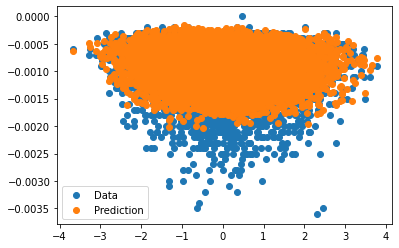

In [ ]:
#Report the root-mean-square error (RMSE) for both the training and validation sets
Result = Direct_sol(std_x_train_df1, y_train, std_x_validation_df1, y_valid1)

In [ ]:
#Calculating the Convergence Threshold
rmse_direct_sol = Result[4]
CT = rmse_direct_sol * 1.001
CT

0.00018801472374812444

## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a full batch gradient descent algorithm and record the training time for our model.

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's **validation** RMSE converges. Here we will consider it converged once **validation RMSE is within 0.1% of the Direct Solution RMSE on the validation set** (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value **Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$)** and will use this value in the next parts too.

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.**[0.5]**

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). **[0.5]**

2. Comment on overfitting/underfitting? **[1]**

**Hint**: 

Initialize your weights with small random numbers (<$0.001$)

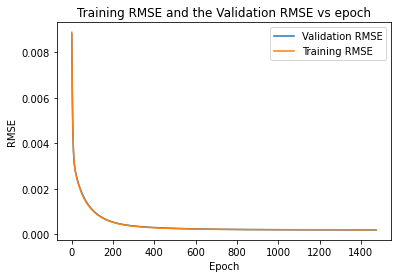

--- Total Training Time: 2.1530635356903076 (s) ---


In [ ]:
import time
start_time = time.time() ## Records current time
rmse_direct_sol = Result[4]
w = (np.random.random(41)).reshape(1,-1)/1000
lr = 0.01  ### Learning rate
rmse_gd=[]
rmse_training = []
rmse_validation = 1
while (rmse_validation >= (rmse_direct_sol * 1.001)):
  y1= np.dot(std_x_train_df1,w.T).reshape (-1,1)
  rmse_training.append(rmse(y1,y_train))
  gradient = (1/len(y1) * np.dot(std_x_train_df1.T, y1-y_train)).reshape(1,-1)

  y2= np.dot(std_x_validation_df1,w.T).reshape (-1,1)
  rmse_validation = rmse(y2,y_valid1)
  rmse_gd.append(rmse_validation)
  w = w - lr * gradient

plt.plot(rmse_gd, label='Validation RMSE')
plt.plot(rmse_training, label='Training RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE and the Validation RMSE vs epoch')
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

**Comment on overfitting/underfitting?**

Overfitting is the case where the overall cost becomes extremely small, and the generalized model becomes unreliable. This is due to the fact that the model memorised the training data completely, instead of capturing the general trend of the dataset.

If the model doesn't learn alot from the training data by stopping the training earlier, this could lead to the model not learning enough patterns from the training data and end up not being abel to capture the dominant trend. This case is called underfitting, resulting in low generalization and unreliable predictions.


 

## Part 4 - Mini-batch and Stochastic Gradient Descent [3.5 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are 
  * Input data (tarining/validation)
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* Remember to shuffle the training data after each epoch (select new mini-batches). 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**
  * Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  * Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  * Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [ ]:
#Function that performs mini gradient descent
def mini_batch(x,batch_size,lr,CT):
  #ignore the runtime warnings when the batch does not converge
  import warnings
  warnings.filterwarnings("ignore", category=RuntimeWarning)

#Choosing random values for initial weights   
  w = (np.random.random(41)).reshape(1,-1)/1000
  epoch_time = []
  conv = 0
  rmse_training1 = []
  rmse_gd1 = []
  conv_count = 0
  no_of_batches = x.shape[0]//batch_size
  start_time = time.time()
  start = time.time()
  for epoch in range(5000):
    data = np.array(x)
#Shuffling the data after each epoch
    data_sh = np.random.permutation(data)
    x_batch = data_sh[:,0:-1]
    y_batch = data_sh[:,-1:]
    x_batch = np.array(x_batch)
    y_batch = np.array(y_batch)
    for i in range(no_of_batches):
      mini_batch_x = x_batch[i*batch_size:(i+1)*batch_size]
      mini_batch_y = y_batch[i*batch_size:(i+1)*batch_size]
      y = np.dot(mini_batch_x,w.T).reshape (-1,1)
      gradient = (1/len(y) * np.dot(mini_batch_x.T, y-mini_batch_y)).reshape(1,-1)
      w = w - lr * gradient
    
    try:
      y1 = np.dot(std_x_train_df1,w.T).reshape (-1,1)
      rmse_training1.append(rmse(y1,y_train))
      
      y2= np.dot(std_x_validation_df1,w.T).reshape (-1,1)
      rmse_validation1 = rmse(y2,y_valid1)
      rmse_gd1.append(rmse_validation1)
      elapsed_time1 = time.time()-start
      epoch_time.append(elapsed_time1)
      if rmse_validation1 <= CT:
        conv = 1
        conv_count += 1
        print('The Batch Size is: %d' %batch_size)
        print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
        print('The Training RMSE ', rmse_training1)
        print('The Validation RMSE ', rmse_gd1)
        print('The Final Training Weights ', w)
        print('The time to complete each of the epoch is ' ,epoch_time)
        break
    except:
      conv = 0
      print('The Batch Size %d Didn"t converge' %batch_size)
      break
  
  
  return rmse_training1,rmse_gd1,w,epoch_time,conv_count,conv

The Batch Size 1 Didn"t converge
The Batch Size 2 Didn"t converge
The Batch Size 4 Didn"t converge
The Batch Size 8 Didn"t converge
The Batch Size 16 Didn"t converge
The Batch Size 32 Didn"t converge
The Batch Size is: 128
--- Total Training Time: 0.3871150016784668 (s) ---
The Training RMSE  [0.0013171403657121104, 0.0006054519133425668, 0.00037450678248103974, 0.0003062355648186488, 0.0002598438063332278, 0.00024610247612196894, 0.00023811638209888763, 0.00023363474969850576, 0.00023021803152228855, 0.00022790753725004126, 0.00022580461826640958, 0.0002240343259322878, 0.0002224977926285796, 0.00022077411762947398, 0.00021932946834877032, 0.0002179744529660098, 0.00021655682936430804, 0.0002152639617073977, 0.00021417703466689413, 0.0002129639777335625, 0.00021168369021894542, 0.00021069187274063025, 0.0002095211959605606, 0.0002085984808699155, 0.0002075615735736814, 0.00020678715239284728, 0.00020567813098812374, 0.0002048259047904371, 0.0002043214800728735, 0.00020324804002974368,

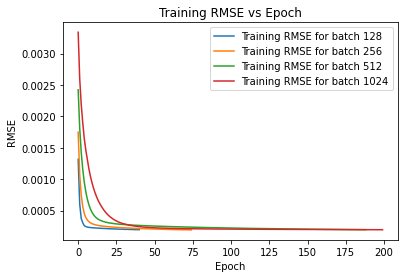

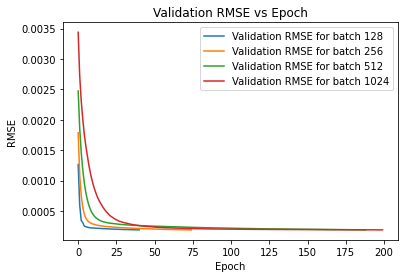

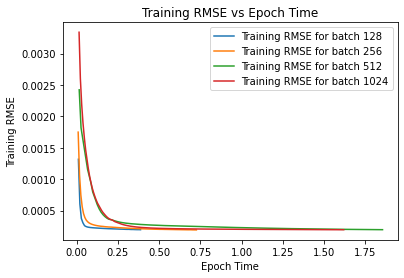

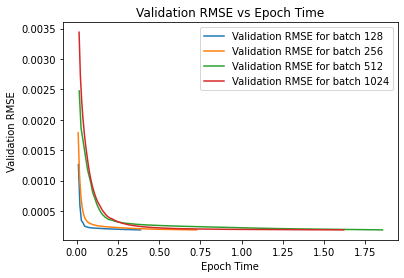

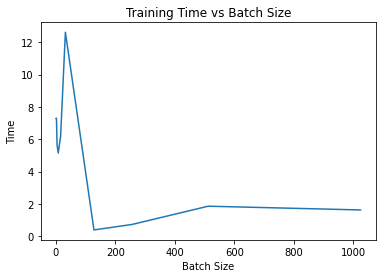

In [ ]:
Batches = [1,2,4,8,16,32,128,256,512,1024]
batch_time = []
conv_batches = []
conv_rmse_training = []
conv_rmse_validation = []
conv_epoch_time = []
conv_count = []
for batch in Batches:
  start1 = time.time()
  mgd = mini_batch(std_x_train_df2,batch,0.01,CT)
  elapsed_time2 = time.time()-start1
  batch_time.append(elapsed_time2)
  
 
  converged = mgd[5]
  if converged == 1:
    conv_rmse_training.append(mgd[0])
    conv_rmse_validation.append(mgd[1])
    conv_batches.append(batch)
    conv_epoch_time.append(mgd[3])
    conv_count.append(mgd[4])

#Plotting Training RMSE vs Epoch
for j in range(len(conv_count)):
  plt.plot(conv_rmse_training[j], label='Training RMSE for batch %d' %conv_batches[j])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Epoch')
plt.legend()
plt.show()

#Plotting Validation RMSE vs Epoch
for j in range(len(conv_count)):
  plt.plot(conv_rmse_validation[j], label='Validation RMSE for batch %d' %conv_batches[j])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Epoch')
plt.legend()
plt.show()

#Plotting Training RMSE vs Epoch Time
for j in range(len(conv_count)):
  plt.plot(conv_epoch_time[j],conv_rmse_training[j], label='Training RMSE for batch %d' %conv_batches[j])
plt.xlabel('Epoch Time')
plt.ylabel('Training RMSE')
plt.title('Training RMSE vs Epoch Time')
plt.legend()
plt.show()

#Plotting Validation RMSE vs Epoch Time
for j in range(len(conv_count)):
  plt.plot(conv_epoch_time[j],conv_rmse_validation[j], label='Validation RMSE for batch %d' %conv_batches[j])
plt.xlabel('Epoch Time')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE vs Epoch Time')
plt.legend()
plt.show()
  
#Plotting Training Time vs Batch Size
plt.plot(Batches,batch_time)
plt.xlabel('Batch Size')
plt.ylabel('Time')
plt.title('Training Time vs Batch Size')
plt.show()

 


**Describe your findings, including the main takeaways from each of your plots**

We can see that for smaller batch sizes the learning rate of 0.01 is large and it fails to converge and overshoots the global minimum (i.e) diverges. 

Looking at the plots we can see that batch size 128 converges faster than the other batches, from the plot training time vs batch size we can see that the best batch in terms of computation time is 128.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. What is the largest learning rate that you can find so that the non-converging batch sizes in the last part converge to a solution. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [ ]:
#Function to go through range of floating numbers
def range_float(start,stop,step):
  x = start
  while x <= stop:
    yield x
    x = x + step
    
#Finding the Largest Learning rate for batch 1
rmse_training_b1 = []
rmse_validation_b1 = []
converged = 0
for lr in range_float(0.0001,0.0003,0.0001):
  print('Learning rate %f' %lr)
  test_lr =  mini_batch(std_x_train_df2,1,lr,CT)

  converged = test_lr[5]
  if converged == 1:
    rmse_training_b1.append(test_lr[0])
    rmse_validation_b1.append(test_lr[1])
    largest_lr_batch1 = lr   
  else:
    break




Learning rate 0.000100
The Batch Size is: 1
--- Total Training Time: 4.077779769897461 (s) ---
The Training RMSE  [0.0012954139518302262, 0.0006998947821306394, 0.00043436672998425945, 0.0003086833974128404, 0.0002706468752545989, 0.00023747269556911987, 0.00022911358524204217, 0.00022379814731659711, 0.0002201522536330593, 0.00021740703943505573, 0.00021532798149391917, 0.00021333597713314937, 0.0002115566312416838, 0.0002104601771112046, 0.0002081934677750703, 0.00020699732981360847, 0.0002051352836945831, 0.0002038410728299466, 0.0002028600592157518, 0.00020150335677625688, 0.00020011231033980058, 0.00019982920434535447, 0.00019799163201594791, 0.00019701815373261448, 0.0001962067982571159, 0.00019539120738377058, 0.00019431829992015262, 0.00019364940033945934]
The Validation RMSE  [0.0012212033632033944, 0.0006938784025046485, 0.0004123799169274501, 0.0002937418881068886, 0.00024834220844737696, 0.00023584066527387374, 0.0002237610324071854, 0.00022138840392811547, 0.00021467874598

In [ ]:
#Finding the Largest Learning rate for batch 2
converged = 0
rmse_training_b2 = []
rmse_validation_b2 = []
for lr in range_float(0.0001,0.0004,0.0001):
  print('Learning rate %f' %lr)
  test_lr =  mini_batch(std_x_train_df2,2,lr,CT)

  converged = test_lr[5]
  if converged == 1:
    rmse_training_b2.append(test_lr[0])
    rmse_validation_b2.append(test_lr[1])
    largest_lr_batch2 = lr 
  else:
    print('It didn"t converge')
    break

Learning rate 0.000100
The Batch Size is: 2
--- Total Training Time: 5.406820774078369 (s) ---
The Training RMSE  [0.0012494200806000709, 0.0007481256355158439, 0.0005257579861503029, 0.0004141540191717423, 0.0003559444627016901, 0.00032288579003831967, 0.00030206404530429347, 0.000288796288142047, 0.0002787679508313465, 0.00027071759711272544, 0.0002646114000668474, 0.0002592517564064747, 0.00025490597051986574, 0.0002512714570942754, 0.00024768269947897804, 0.00024454720193767667, 0.00024170846630402663, 0.0002392513274907996, 0.00023667552839566557, 0.0002343864594992748, 0.00023259441134495804, 0.00023027497390821122, 0.00022826628604201982, 0.00022650675703706784, 0.00022456135052476177, 0.00022284900793532875, 0.00022118814457613571, 0.00021984673115685814, 0.00021859214194556322, 0.0002170245398935217, 0.00021538111477520605, 0.0002138714031718909, 0.0002124427104485914, 0.00021114195562139674, 0.0002098961936127753, 0.00020876453349918738, 0.00020758068310455677, 0.000206463737

In [ ]:
#Finding the Largest Learning rate for batch 4
converged = 0
rmse_training_b4 = []
rmse_validation_b4 = []
for lr in range_float(0.0001,0.001,0.0001):
  print('Learning rate %f' %lr)
  test_lr =  mini_batch(std_x_train_df2,4,lr,CT)

  converged = test_lr[5]
  if converged == 1:
    rmse_training_b4.append(test_lr[0])
    rmse_validation_b4.append(test_lr[1])
    largest_lr_batch4 = lr 
  else:
    print('It didn"t converge')
    break

Learning rate 0.000100
The Batch Size is: 4
--- Total Training Time: 2.3720695972442627 (s) ---
The Training RMSE  [0.002006105692850263, 0.0014117466010536532, 0.001082554250303392, 0.0008739162029759052, 0.0007286308523611872, 0.0006227690758920877, 0.000543629761905815, 0.0004827289547249071, 0.00043488472817525785, 0.00039662651046249527, 0.00036533446910832985, 0.00033972861987269655, 0.0003182784278929373, 0.00030060147039785685, 0.000285198013169626, 0.0002723686414202499, 0.00026134423632947064, 0.00025211397311120895, 0.0002441119682749542, 0.00023736748855836205, 0.00023152452558748007, 0.00022656846945451944, 0.00022232955630707986, 0.00021874341654013797, 0.00021562183074971816, 0.00021291359405814243, 0.00021058616549919496, 0.00020865086069649902, 0.00020688894232025168, 0.00020539933303926613, 0.00020414732856719007, 0.00020304096020817651, 0.00020209379034448675, 0.00020122722746630927, 0.00020040819602460877, 0.00019970772936342735, 0.0001991477925799908, 0.00019856290

In [ ]:
#Finding the Largest Learning rate for batch 8
converged = 0
rmse_training_b8 = []
rmse_validation_b8 = []
for lr in range_float(0.001,0.003,0.001):
  print('Learning rate %f' %lr)
  test_lr =  mini_batch(std_x_train_df2,8,lr,CT)

  converged = test_lr[5]
  if converged == 1:
    rmse_training_b8.append(test_lr[0])
    rmse_validation_b8.append(test_lr[1])
    largest_lr_batch8 = lr 

Learning rate 0.001000
The Batch Size is: 8
--- Total Training Time: 0.8481345176696777 (s) ---
The Training RMSE  [0.0018571203318951339, 0.0018317551787421513, 0.0013124841730379013, 0.0013053361300453127, 0.0010212145521908554, 0.0007990711542317958, 0.0006739219457577767, 0.0005264148733768688, 0.0004419256848983165, 0.00039129315108104863, 0.00035541986178965114, 0.0003074618626749512, 0.00030630699172111013, 0.00025602790917552104, 0.00023928059822973506, 0.00023732349400203175, 0.00024168599858212213, 0.00024071838857687517, 0.00022301422514165375, 0.00021217451974558384, 0.00021038534557447702, 0.00020459645405702793, 0.0002029625512050597, 0.00020052802466448584, 0.00020443848647690402, 0.00019975905116876707, 0.0001991170031086606]
The Validation RMSE  [0.0014984615361435067, 0.0017933756877240028, 0.000946335272802375, 0.0013680651882081582, 0.0009445784479070857, 0.0007271479041973956, 0.0005860738296248013, 0.0004722147945216644, 0.0003753331234111832, 0.000346347195512978

In [ ]:
#Finding the Largest Learning rate for batch 16
converged = 0
rmse_training_b16 = []
rmse_validation_b16 = []
for lr in range_float(0.001,0.004,0.001):
  print('Learning rate %f' %lr)
  test_lr =  mini_batch(std_x_train_df2,16,lr,CT)

  converged = test_lr[5]
  if converged == 1:
    rmse_training_b16.append(test_lr[0])
    rmse_validation_b16.append(test_lr[1])
    largest_lr_batch16 = lr 
  else:
    break

Learning rate 0.001000
The Batch Size is: 16
--- Total Training Time: 0.6457915306091309 (s) ---
The Training RMSE  [0.0012298707049814182, 0.0006991496186618682, 0.0004717509085606982, 0.00036264325405840144, 0.0003053312214779585, 0.0002723166997559198, 0.0002512076759650338, 0.00023821917124834365, 0.00022787638436085406, 0.00022132208575643077, 0.00021676352856128374, 0.00021370075048456695, 0.0002103573331264333, 0.00020858834921831852, 0.00020664886565416603, 0.0002052936672841543, 0.00020401968597791016, 0.00020333787439432964, 0.00020206881946895324, 0.0002012223595187993, 0.00020040048249286496, 0.00019964391799483726, 0.00019902427079342047, 0.0001986661566778033, 0.00019759048181212374, 0.00019705912816374136, 0.00019656484868172257, 0.00019649147526279947, 0.00019542380588721491, 0.00019502416171404615, 0.0001942875201763322, 0.00019391406331400115, 0.0001935677257680121]
The Validation RMSE  [0.0012332789520548076, 0.0006890285684687319, 0.0004568890793822307, 0.0003497500

In [ ]:
#Finding the Largest Learning rate for batch 32
converged = 0
rmse_training_b32 = []
rmse_validation_b32 = []
for lr in range_float(0.001,0.01,0.001):
  print('Learning rate %f' %lr)
  test_lr =  mini_batch(std_x_train_df2,32,lr,CT)

  converged = test_lr[5]
  if converged == 1:
    rmse_training_b32.append(test_lr[0])
    rmse_validation_b32.append(test_lr[1])
    largest_lr_batch32 = lr 
  else:
    print('It didn"t converge')
    break

Learning rate 0.001000
The Batch Size is: 32
--- Total Training Time: 0.2965710163116455 (s) ---
The Training RMSE  [0.0020015782219349495, 0.0012857600323811402, 0.0009062643184677708, 0.0006724890223923986, 0.0005186902556323783, 0.0004160642569322452, 0.0003474694133265336, 0.00030149612103320413, 0.0002706775897242684, 0.0002494968594061273, 0.00023467445168862583, 0.0002234868553122367, 0.00021536240516992585, 0.0002091953886282497, 0.00020435248243893975, 0.00020051809219761232, 0.0001973520322777061, 0.00019487094202453337, 0.00019285206312029645, 0.00019115101889889715, 0.00018972121684638236, 0.00018854357072905576]
The Validation RMSE  [0.002140531839625142, 0.0013858490537812741, 0.0009820492034867212, 0.0007313483596202817, 0.0005762943721398618, 0.00046766957222763814, 0.0003959606684329062, 0.00034642601266657877, 0.0003077337704085845, 0.0002820839015258597, 0.0002628105362011499, 0.00024793249833533277, 0.00023562795647682163, 0.00022395473947160694, 0.00021749799588801

In [ ]:
#Creating a table to present the findings for the various batch sizes
lr_table = pd.DataFrame({'Batch Size': [1,2,4,8,16,32], 'Learning Rate': [largest_lr_batch1,largest_lr_batch2,largest_lr_batch4,
                                                                          largest_lr_batch8,largest_lr_batch16,largest_lr_batch32], 
                      'Training RMSE': [rmse_training_b1[0][-1],rmse_training_b2[1][-1],rmse_training_b4[4][-1],rmse_training_b8[0][-1],
                                        rmse_training_b16[1][-1],rmse_training_b32[3][-1]],
                      'Validatiom RMSE': [rmse_validation_b1[0][-1],rmse_validation_b2[1][-1],rmse_validation_b4[4][-1],
                                          rmse_validation_b8[0][-1],rmse_validation_b16[1][-1],rmse_validation_b32[3][-1]]})
                     

In [ ]:
lr_table.set_index('Batch Size', inplace=True)

In [ ]:
lr_table

,Learning Rate,Training RMSE,Validatiom RMSE
Batch Size,,,
1,0.0001,0.000194,0.000187
2,0.0002,0.000198,0.000186
4,0.0005,0.000197,0.000186
8,0.0010,0.000199,0.000183
16,0.0020,0.000196,0.000185
32,0.0040,0.000198,0.000187


In [ ]:
#The Best Batch from part 4 based on the computation time is Batch Size 128

The Learning rate is: 0.005000
The Batch Size is: 128
--- Total Training Time: 0.37462329864501953 (s) ---
The Training RMSE  [0.001756378149687787, 0.0009663714182194651, 0.0006504062943286348, 0.0004853823481739847, 0.00038592560218658056, 0.0003271478141344219, 0.00029018435202240274, 0.0002662895968193314, 0.0002497923283882229, 0.0002385704816031139, 0.00023055853856341444, 0.00022452061150087318, 0.00021971961408372221, 0.000215954156210486, 0.00021305011385938958, 0.0002106144712056845, 0.00020860051236638925, 0.0002069114513437794, 0.00020551380918248008, 0.00020425056942228678, 0.00020314999042647596, 0.00020219187895875618, 0.0002013465151758094, 0.0002005624985350013, 0.00019987559046204565, 0.0001992032413070702, 0.0001986802759027482, 0.0001980837140996652, 0.0001980166946136233, 0.00019731590554355368, 0.00019667018916226113, 0.00019601490724078914, 0.00019557845158132094, 0.00019514366839777061, 0.00019486137658844912, 0.00019441803297617265, 0.00019402911209599107, 0.00

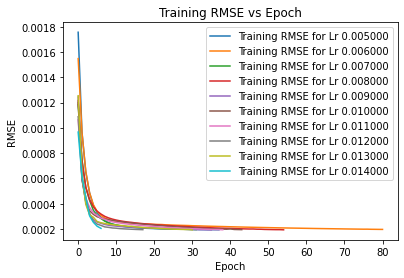

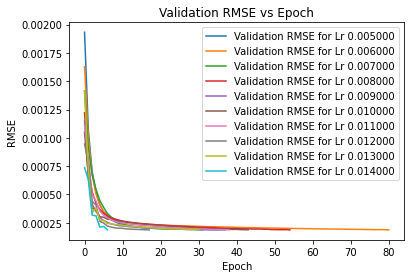

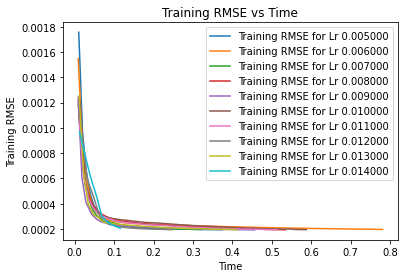

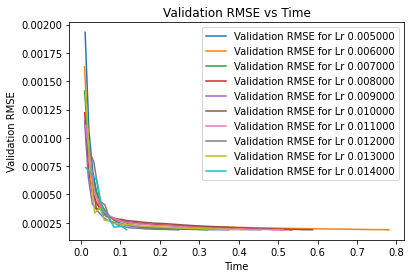

In [ ]:
converged = 0
conv_rmse_training = []
conv_rmse_validation = []
conv_epoch_time = []
conv_count = []
lrs = list(range_float(0.005,0.015,0.001))
#looping through learning rates from 0.005 to 0.015
for lr in lrs:
  print('The Learning rate is: %f' %lr)
  mgd = mini_batch(std_x_train_df2,128,lr,CT)  
 
  converged = mgd[5]
  if converged == 1:
    conv_rmse_training.append(mgd[0])
    conv_rmse_validation.append(mgd[1])
    conv_epoch_time.append(mgd[3])
    conv_count.append(mgd[4])

#Plotting Training RMSE vs Epoch
for j in range(len(conv_count)):
  plt.plot(conv_rmse_training[j], label='Training RMSE for Lr %f' %lrs[j])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Epoch')
plt.legend()
plt.show()

#Plotting Validation RMSE vs Epoch
for j in range(len(conv_count)):
  plt.plot(conv_rmse_validation[j], label='Validation RMSE for Lr %f' %lrs[j])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Epoch')
plt.legend()
plt.show()

#Plotting Training RMSE vs Time
for j in range(len(conv_count)):
  plt.plot(conv_epoch_time[j],conv_rmse_training[j], label='Training RMSE for Lr %f' %lrs[j])
plt.xlabel('Time')
plt.ylabel('Training RMSE')
plt.title('Training RMSE vs Time')
plt.legend()
plt.show()

#Plotting Validation RMSE vs Time
for j in range(len(conv_count)):
  plt.plot(conv_epoch_time[j],conv_rmse_validation[j], label='Validation RMSE for Lr %f' %lrs[j])
plt.xlabel('Time')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE vs Time')
plt.legend()
plt.show()

**Describe your findings, including the main takeaways from each of your plots**

The learning rate determines how big the step would be on each iteration. From the various plots we can see that, If the learning rate is very small, it would take long time to converge and become computationally expensive but if the learning rate is large, it may fail to converge and overshoot the minimum.

Observing the graphs we can see that the best learning rate for the batch size 128 is 0.008 to 0.014. So I have chosen learning rate of 0.012.


## Part 6 - Introducing Momentum [1.5 marks]
Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, where $\alpha$ is the learning rate and $g_t$ is your gradient (weight updates), the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$.

 $\beta$ is the momentum coefficient, between [0, 1]. Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also are a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

Pick one of your best models from the previous part and try to investigate the effect of momentum.
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the momentums that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the momentums that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [ ]:
#Including momentum to the mini gradient descent function
def mini_gradient_momentum(x,batch_size,beta,lr,CT):
#Ignore the runtime warnings when the batch does not converge
  import warnings
  warnings.filterwarnings("ignore", category=RuntimeWarning)
 
 #Choosing random values for initial weights        
  w = (np.random.random(41)).reshape(1,-1)/1000
  epoch_time = []
  conv = 0
  conv_count = 0
  rmse_training1 = []
  rmse_gd1 = []
  #Initializing the first gradient as 0
  gradient = 0
  no_of_batches = x.shape[0]//batch_size
  start_time = time.time()
  start = time.time()
  for epoch in range(5000):
    data = np.array(x)
    data_sh = np.random.permutation(data)
    x_batch = data_sh[:,0:-1]
    y_batch = data_sh[:,-1:]
    x_batch = np.array(x_batch)
    y_batch = np.array(y_batch)
    for i in range(no_of_batches):
      mini_batch_x = x_batch[i*batch_size:(i+1)*batch_size]
      mini_batch_y = y_batch[i*batch_size:(i+1)*batch_size]
      y = np.dot(mini_batch_x,w.T).reshape (-1,1)
      # Updating weights with momentum to lower the computation time 
      gradient = beta * gradient + (1-beta) * (1/len(y) * np.dot(mini_batch_x.T, y-mini_batch_y)).reshape(1,-1)
      w = w - lr * gradient
      prev_gradient = gradient
    
    try:
      y1 = np.dot(std_x_train_df1,w.T).reshape (-1,1)
      rmse_training1.append(rmse(y1,y_train))
      
      y2= np.dot(std_x_validation_df1,w.T).reshape (-1,1)
      rmse_validation1 = rmse(y2,y_valid1)
      rmse_gd1.append(rmse_validation1)
      elapsed_time1 = time.time()-start
      epoch_time.append(elapsed_time1)
      if rmse_validation1 <= CT:
        conv_count += 1
        conv = 1
        print('The Batch Size is: %d' %batch_size)
        print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
        print('The Training RMSE ', rmse_training1)
        print('The Validation RMSE ', rmse_gd1)
        print('The Final Training Weights ', w)
        print('The time to complete each of the epoch is ' ,epoch_time)
        break
    except:
      conv = 0
      print('The Batch Didn"t Converge')
      break
   
  return rmse_training1,rmse_gd1,w,epoch_time,conv_count,conv

The Beta number is: 0.100000
The Batch Size is: 128
--- Total Training Time: 0.34128808975219727 (s) ---
The Training RMSE  [0.0009882881472932877, 0.0005765431607303771, 0.00038386821346043015, 0.00031618405734104354, 0.0002796252858623716, 0.0002574597524723196, 0.00024215135979612247, 0.00023472576923576946, 0.0002298292545167165, 0.0002258529259335166, 0.00022298129131441614, 0.00022021591724011384, 0.00021827858216920932, 0.00021645448476089637, 0.000214618784616575, 0.00021299424417559737, 0.00021177407635223434, 0.00020965078366560292, 0.00020845841607608669, 0.00020700190076344913, 0.00020597565002698334, 0.0002045489714981186, 0.00020350845497446384, 0.0002023630360055967, 0.00020105313746869805, 0.00020084951788787136, 0.00019936945709872264, 0.0001983236149072634, 0.0001974604807841467, 0.0001968830957248067, 0.0001956684574552377, 0.00019498499794483502]
The Validation RMSE  [0.0008596273835904965, 0.0006265450837758579, 0.0003435490049062702, 0.0003522747504957314, 0.00028

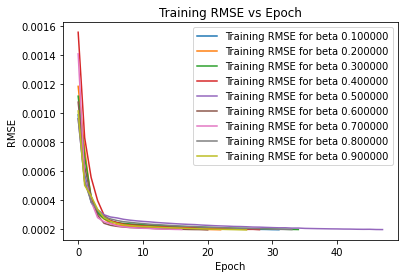

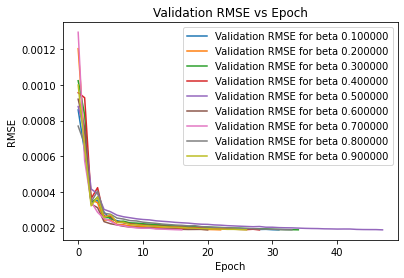

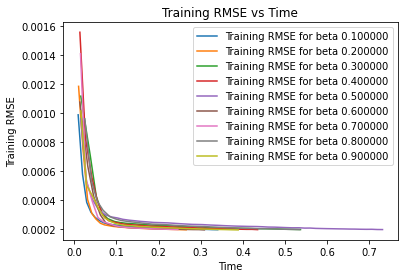

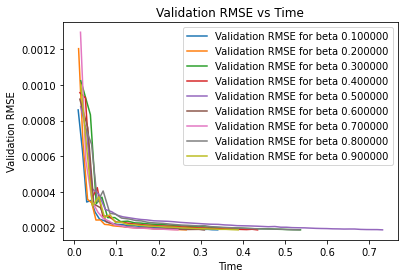

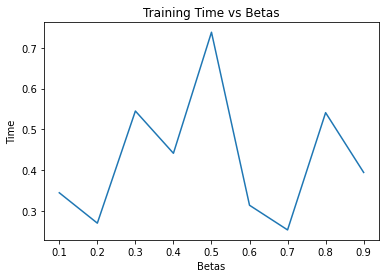

In [ ]:
#The Best model from the previous section is Lr 0.012 based on computation time
converged = 0
conv_rmse_training = []
conv_rmse_validation = []
conv_epoch_time = []
conv_count = []
betas_time = []
#List of beta values from 0.1 to 0.9
betas = list(range_float(0.1,0.9,0.1))
for beta in betas:
  print('The Beta number is: %f' %beta)
  start1 = time.time()
  mgd = mini_gradient_momentum(std_x_train_df2,128,beta,0.012,CT)  
  elapsed_time2 = time.time()-start1
  betas_time.append(elapsed_time2)
 
  converged = mgd[5]
  if converged == 1:
    conv_rmse_training.append(mgd[0])
    conv_rmse_validation.append(mgd[1])
    conv_epoch_time.append(mgd[3])
    conv_count.append(mgd[4])

#Plotting Training RMSE vs Epoch
for j in range(len(conv_count)):
  plt.plot(conv_rmse_training[j], label='Training RMSE for beta %f' %betas[j])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Epoch')
plt.legend()
plt.show()

#Plotting Validation RMSE vs Epoch
for j in range(len(conv_count)):
  plt.plot(conv_rmse_validation[j], label='Validation RMSE for beta %f' %betas[j])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Epoch')
plt.legend()
plt.show()

#Plotting Training RMSE vs Time
for j in range(len(conv_count)):
  plt.plot(conv_epoch_time[j],conv_rmse_training[j], label='Training RMSE for beta %f' %betas[j])
plt.xlabel('Time')
plt.ylabel('Training RMSE')
plt.title('Training RMSE vs Time')
plt.legend()
plt.show()

#Plotting Validation RMSE vs Time
for j in range(len(conv_count)):
  plt.plot(conv_epoch_time[j],conv_rmse_validation[j], label='Validation RMSE for beta %f' %betas[j])
plt.xlabel('Time')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE vs Time')
plt.legend()
plt.show()

#Plotting Training Time vs Beta values
plt.plot(betas, betas_time)
plt.xlabel('Betas')
plt.ylabel('Time')
plt.title('Training Time vs Betas')
plt.show()

**Describe your findings, including the main takeaways from each of your plots**

Momentum is designed to accelerate the optimization process, e.g. to decrease the number of function evaluations required to reach the global minima, or to improve the capability of the optimization algorithm.

From the plots the best beta values are in the range of 0.2 to 0.7. I have chosen the beta value 0.4 as it's consistently close to the best value during various tests.

## Part 7 - Finalizing a model [1 marks]
Based on your findings from the previous parts (Parts 1 - 6), pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the training and validation sets. Briefly justify your model selections/settings. Summarize the performance of your model for the task of managing ailerons of an F16 aircraft. In your summary please provide pros and cons of using this linear regression model to solve the problem.

The Batch Size is: 128
--- Total Training Time: 0.1829369068145752 (s) ---
The Training RMSE  [0.0011469803460866551, 0.0006490872190299849, 0.00041532941281054533, 0.00030188255038616216, 0.0002481286946070714, 0.00022772740413514204, 0.00021406764075751337, 0.00020688044981520418, 0.00020226161541237467, 0.00020055485218310225, 0.0001974656837150391, 0.00019680424971395722, 0.00019501656044713632, 0.00019415657354616622, 0.00019424800365554608, 0.00019285470043841463, 0.0001921710831415545]
The Validation RMSE  [0.001026785297327051, 0.0005845487816369305, 0.0003700153916918642, 0.0002977182144002456, 0.00023738371968722388, 0.0002258026989220596, 0.00020731819290401824, 0.00020248252548982259, 0.00019740274684655365, 0.0001932265639983199, 0.00019225780799986652, 0.00019340895811538846, 0.00018977925174076032, 0.0001891292359233589, 0.00019106934173963055, 0.0001887079818985034, 0.0001878079943094787]
The Final Training Weights  [[-8.74013610e-04  1.12962495e-05  1.90926205e-06 -1.3

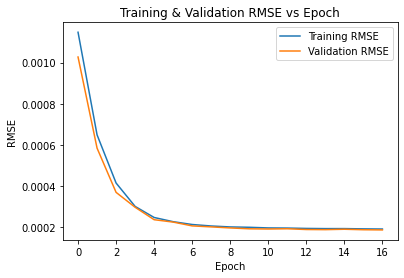

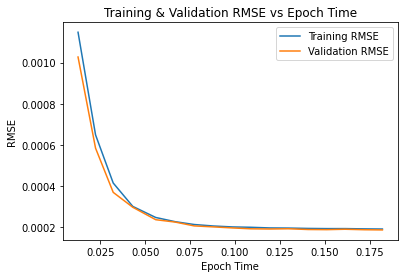

In [ ]:
#The final model with Lr 0.012 and beta 0.4 and batch size 128
mgd = mini_gradient_momentum(std_x_train_df2,128,0.4,0.012,CT)
plt.plot(mgd[0], label='Training RMSE')
plt.plot(mgd[1], label= 'Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training & Validation RMSE vs Epoch')
plt.legend()
plt.show()

plt.plot(mgd[3],mgd[0], label= 'Training RMSE')
plt.plot(mgd[3],mgd[1], label= 'Validation RMSE')
plt.xlabel('Epoch Time')
plt.ylabel('RMSE')
plt.title('Training & Validation RMSE vs Epoch Time')
plt.legend()
plt.show()

**Briefly justify your model selections/settings. Summarize the performance of your model for the task of managing ailerons of an F16 aircraft. In your summary please provide pros and cons of using this linear regression model to solve the problem.**



The Model chosen has a very high computational speed and it converges quickly which would make it the best model for the task of controling the ailerons of an F16 aircraft.

Pros:

1) When you know the relationship between the independent and dependent variable have a linear relationship, this algorithm is the best to use because of it’s less complexity to compared to other algorithms

2) Linear Regression is simple to implement and easier to interpret the output coefficients

Cons:

1) Linear regression assumes a linear relationship between dependent and independent variables. It assumes independence between attributes.

2) Linear regression technique outliers can have huge effects on the regression and boundaries are linear in this technique.

## Part 8 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 7. In this part you will be completing some additional coding tasks using a different dataset and submitting your results onto Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/cMZn2WxY to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/aps1070-2019/project-4-git-******
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/aps1070-2019/project-4-git-******
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add Project_4_git.ipynb
git commit -m “Final Submission”
git push origin master
```

 9. Make sure your submission is ready for grading. Open the private repository link that you copied below in your browser and make sure you can see your final submission with your latest changes there. 

**Private Repository Link :** https://github.com/aps1070-2019/project-4-git-Anchit017

**[3 marks]**

---

